In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [8]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

### Principal Componenent analysis 
- Is a feature reduction/dimansonreduction process t odecrease the scae of yur data 
- This. process containes no classification or regression anakysis 
- we sinply use a PCA to find the 2 or mor mot Principal components

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scalar = MinMaxScaler()

In [11]:
df_scaled =scalar.fit_transform(df)

In [14]:
np.max(df_scaled)

1.0000000000000002

## impporting  PCA fro mSklearn 

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca_obj  = PCA(n_components=2)

In [17]:
pca_data = pca_obj.fit_transform(df_scaled)

In [19]:
pca_data.shape

(569, 2)

In [21]:
pca_df = pd.DataFrame(pca_data)

In [22]:
pca_df["target"] = data["target"]

In [23]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   target  569 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 13.5 KB


### initially we canot see the difference in the scatter plot
- if we were to color the points by our target we will se a clear distinguishness of the targets 
- we will see a clear seperation of the 2 points
- The 2 components will seperate into do didata sets that can clearly explain the two trgets

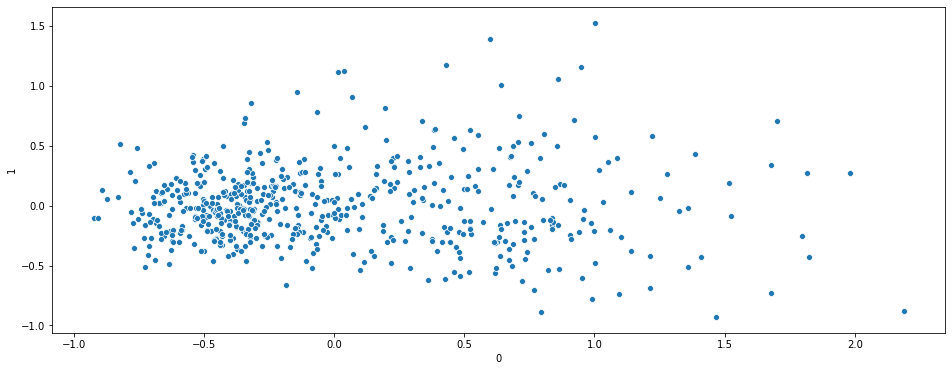

In [27]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=pca_df[0], y = pca_df[1], data= pca_df)

## Show the effect of PCAs

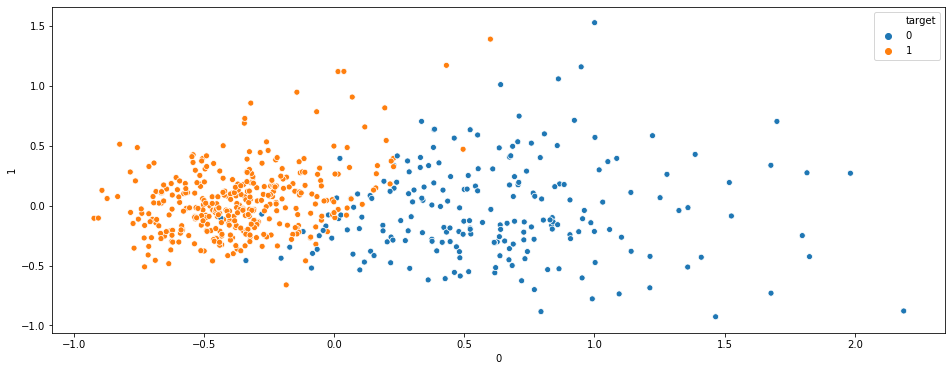

In [28]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=pca_df[0], y = pca_df[1], data= pca_df, hue="target")

### Unfortunate
- This comes at a cost of of not truly understanding the features completly
- Because the PCAs values comes as a compination of all features so we lose the ability to understand the features 
- Also we need extract the components of the PCA object and how they relate to each feature name

In [32]:
components = pd.DataFrame(pca_obj.components_, columns=data["feature_names"])

In [33]:
components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.242676,0.096479,0.25255,0.216495,0.109695,0.240398,0.301914,0.322475,0.111432,0.043298,...,0.259387,0.113833,0.260708,0.205918,0.123774,0.204993,0.244084,0.371065,0.095923,0.094634
1,-0.261317,-0.059058,-0.23859,-0.231107,0.199884,0.213915,0.113811,-0.008312,0.211115,0.406392,...,-0.244282,-0.039682,-0.211635,-0.198979,0.229455,0.198064,0.154982,0.044329,0.151169,0.258092


### WE can visuallly see this effect by plotting this into a heat map

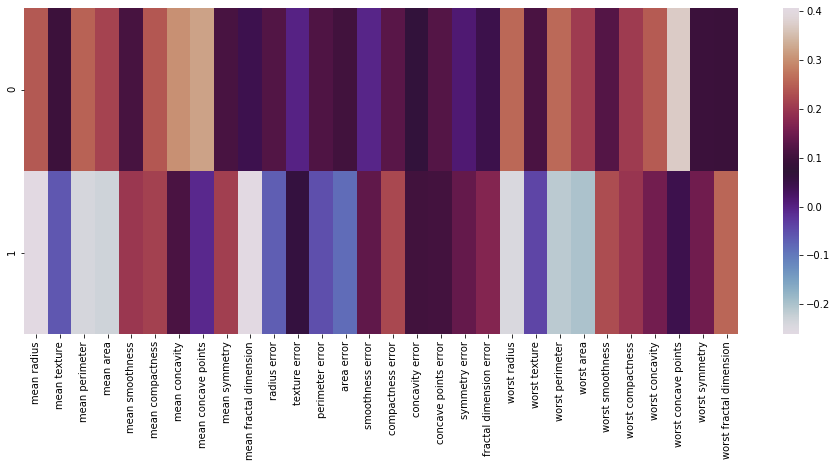

In [36]:
plt.figure(figsize=(16,6))
sns.heatmap(components, cmap="twilight")

### lets use the PCAs not to preform a classification on on the preast cancer data 

In [37]:
pca_df

,0,1,target
0,1.387021,0.426895,0
1,0.462308,-0.556947,0
2,0.954621,-0.109701,0
3,1.000816,1.525089,0
4,0.626828,-0.302471,0
...,...,...,...
564,1.002840,-0.474785,0
565,0.620757,-0.517200,0
566,0.226311,-0.287946,0
567,1.677834,0.335946,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
X = pca_df.drop("target", axis=1)
y = pca_df["target"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
len(X_train)

381

In [44]:
len(X_test)

188

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions = model.predict(X_test)

### MEtrics

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        67
           1       0.94      0.96      0.95       121

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



In [50]:
print(confusion_matrix(y_test,predictions))

[[ 59   8]
 [  5 116]]


In [51]:
print(explained_variance_score(y_test,predictions))

0.6996422844455409


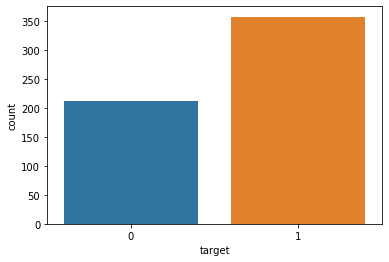

In [53]:
sns.countplot(pca_df["target"])

### Random Prediction
- lets see how the model will predict on random pdata passed 

In [88]:
from random import randint
rand_index = randint(1, len(pca_df))
rand_data = pca_df.drop("target",axis=1).iloc[rand_index]

In [89]:
X_train.shape

(381, 2)

In [90]:
rand_data = rand_data.values.reshape(1,2)

In [91]:
rand_data.shape

(1, 2)

In [92]:
model.predict(rand_data)

array([1])

### Checking True Value

In [93]:
pca_df.iloc[rand_index]["target"]

1.0